In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# early_stopping = EarlyStopping(
#     min_delta=1e-7, # minimium amount of change to count as an improvement
#     patience=20, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )

In [2]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [3]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
634,2022-04-05,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010
635,2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010
636,2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010
637,2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990
638,2022-04-11,1008.469971,974.640015,980.400024,975.929993,19660500.0,975.929993


Text(0, 0.5, 'Closed price')

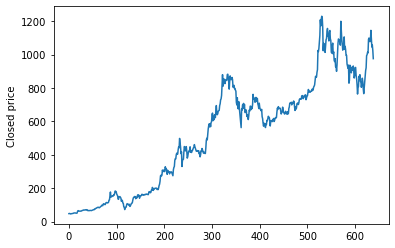

In [3]:
plt.plot(df.index, df['Close'])
plt.ylabel('Closed price')

In [5]:
df1 = df[:628]
df2 = df[628:]

In [6]:
df_use = df1['Close']
df_use

0        48.174000
1        48.938000
2        48.625999
3        46.605999
4        46.285999
          ...     
623     921.159973
624     993.979980
625     999.109985
626    1013.919983
627    1010.640015
Name: Close, Length: 628, dtype: float64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_use=scaler.fit_transform(np.array(df_use).reshape(-1,1))

In [8]:
train_size = int(0.7 * len(df_use))
train_data = df_use[:train_size, :]
test_data = df_use[train_size:, :1]
# train_data = np.array(train_data)
# test_data = np.array(test_data)

In [10]:
train_data.shape, test_data.shape

((439, 1), (189, 1))

In [11]:
# print(train_data.shape)
# print(test_data.shape)
# print(train_data)
train_data[1:3]

array([[0.00224058],
       [0.00197698]])

In [13]:
def creat_xy(dataset, time_step):
    x_data = []
    y_data = []
    for i in range(len(dataset) - time_step - 1):
        x_data.append(dataset[i:i + time_step, 0])
        y_data.append(dataset[i+time_step, 0])
    return (np.array(x_data), np.array(y_data))

In [14]:
time_step = 30
(x_train, y_train) = creat_xy(train_data, time_step)
(x_test, y_test) = creat_xy(test_data, time_step)

In [15]:
x_train.shape

(408, 30)

In [16]:
y_train.shape

(408,)

In [17]:
model = Sequential([
    layers.LSTM(50, return_sequences = True, input_shape = (30, 1)),
    layers.LSTM(50, return_sequences = True),
    layers.LSTM(50),
    layers.Dense(1)
])
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test), batch_size = 64, verbose = 1)

Epoch 1/100
7/7 [==============================] - 13s 434ms/step - loss: 0.0510 - val_loss: 0.0392
Epoch 2/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0120 - val_loss: 0.0623
Epoch 3/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0085 - val_loss: 0.0068
Epoch 4/100
7/7 [==============================] - 1s 88ms/step - loss: 0.0049 - val_loss: 0.0072
Epoch 5/100
7/7 [==============================] - 1s 85ms/step - loss: 0.0035 - val_loss: 0.0134
Epoch 6/100
7/7 [==============================] - 1s 86ms/step - loss: 0.0025 - val_loss: 0.0066
Epoch 7/100
7/7 [==============================] - 1s 86ms/step - loss: 0.0024 - val_loss: 0.0092
Epoch 8/100
7/7 [==============================] - 1s 86ms/step - loss: 0.0022 - val_loss: 0.0067
Epoch 9/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0021 - val_loss: 0.0076
Epoch 10/100
7/7 [==============================] - 1s 85ms/step - loss: 0.0020 - val_loss: 0.0072
Epoch 11/100
7/7 

In [20]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

5/5 [==============================] - 0s 21ms/step


In [22]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[ 718.18787],
       [ 721.9898 ],
       [ 723.2579 ],
       [ 723.60693],
       [ 723.19543],
       [ 719.8187 ],
       [ 712.2521 ],
       [ 703.4708 ],
       [ 693.91345],
       [ 685.2273 ],
       [ 680.24695],
       [ 679.4149 ],
       [ 682.1894 ],
       [ 686.57635],
       [ 692.15063],
       [ 699.5088 ],
       [ 708.20746],
       [ 717.0825 ],
       [ 724.9575 ],
       [ 731.1995 ],
       [ 737.0376 ],
       [ 742.4889 ],
       [ 747.29236],
       [ 749.5701 ],
       [ 749.76416],
       [ 748.4535 ],
       [ 747.1455 ],
       [ 746.36975],
       [ 746.37714],
       [ 744.59076],
       [ 741.62195],
       [ 739.0502 ],
       [ 737.49744],
       [ 738.7133 ],
       [ 743.7773 ],
       [ 750.52454],
       [ 757.75446],
       [ 763.8338 ],
       [ 768.0633 ],
       [ 770.80273],
       [ 772.1484 ],
       [ 772.5326 ],
       [ 773.1399 ],
       [ 773.4325 ],
       [ 773.8435 ],
       [ 775.50525],
       [ 778.6669 ],
       [ 783.

In [23]:
math.sqrt(mean_squared_error(y_test, test_predict))

854.9040681600152

In [26]:
math.sqrt(mean_squared_error(y_train, train_predict))

462.85552075013135

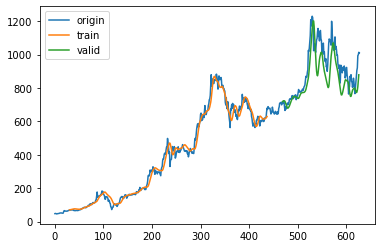

In [24]:
### Plotting 
# shift train predictions for plotting
look_back=30
trainPredictPlot = np.empty_like(df_use)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_use)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_use)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_use))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['origin','train', 'valid'])
plt.show()

In [27]:
model.predict(df2['Close'])

1/1 [==============================] - 2s 2s/step


array([[0.6027733 ],
       [0.60267705],
       [0.6027464 ],
       [0.60295516],
       [0.60286516],
       [0.60213876],
       [0.60278064],
       [0.60338277],
       [0.60322493],
       [0.6036711 ],
       [0.6044311 ]], dtype=float32)

In [28]:
x_input=test_data[len(test_data)-30:].reshape(1,-1)
x_input.shape

(1, 30)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
lst_output=[]
n_steps=30
i=0
while(i<11):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7709887]
31
1 day input [0.70079179 0.74022153 0.74103262 0.70129023 0.68492524 0.6549749
 0.60640369 0.63743554 0.64512377 0.69628866 0.69116879 0.70428108
 0.66997962 0.66913476 0.64065446 0.65739965 0.68660651 0.66914321
 0.63285634 0.60837223 0.63838178 0.67077379 0.69727714 0.72582508
 0.73914854 0.80067146 0.80500561 0.81751803 0.8147469  0.7709887 ]
1 day output [[0.7916058]]
2 day input [0.74022153 0.74103262 0.70129023 0.68492524 0.6549749  0.60640369
 0.63743554 0.64512377 0.69628866 0.69116879 0.70428108 0.66997962
 0.66913476 0.64065446 0.65739965 0.68660651 0.66914321 0.63285634
 0.60837223 0.63838178 0.67077379 0.69727714 0.72582508 0.73914854
 0.80067146 0.80500561 0.81751803 0.8147469  0.7709887  0.79160577]
2 day output [[0.80139536]]
3 day input [0.74103262 0.70129023 0.68492524 0.6549749  0.60640369 0.63743554
 0.64512377 0.69628866 0.69116879 0.70428108 0.66997962 0.66913476
 0.64065446 0.65739965 0.68660651 0.66914321 0.63285634 0.60837223
 0.63838178 0.67077379

In [31]:
day_new=np.arange(628 - 30, 628)
day_pred=np.arange(628,628 + 11)
day_pred

array([628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638])

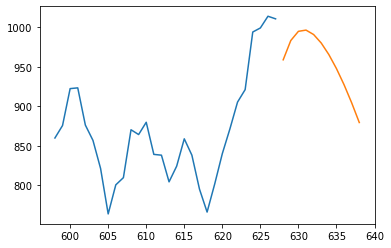

In [32]:
plt.plot(day_new,scaler.inverse_transform(df_use[628 - 30:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

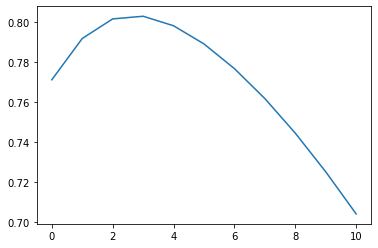

In [35]:
df3=df_use.tolist()
df3.extend(lst_output)
plt.plot(df3[628:])

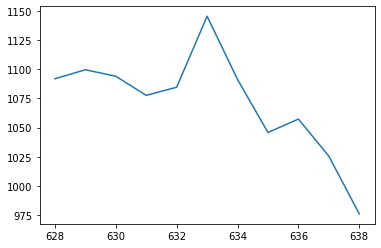

In [34]:
plt.plot(df['Close'][-11:])

In [38]:
df[629:]

,Date,High,Low,Open,Close,Volume,Adj Close
629,2022-03-29,1114.770020,1073.109985,1107.989990,1099.569946,24538300.0,1099.569946
630,2022-03-30,1113.949951,1084.000000,1091.170044,1093.989990,19955000.0,1093.989990
631,2022-03-31,1103.140015,1076.640015,1094.569946,1077.599976,16330900.0,1077.599976
632,2022-04-01,1094.750000,1066.640015,1081.150024,1084.589966,18012900.0,1084.589966
633,2022-04-04,1149.910034,1072.530029,1089.380005,1145.449951,27345300.0,1145.449951
634,2022-04-05,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010
635,2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010
636,2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010
637,2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990
638,2022-04-11,1008.469971,974.640015,980.400024,975.929993,19660500.0,975.929993
